In [194]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as mpl

In [333]:
geodf = gpd.read_file("Brasil.shp")
#geodf
geodf.head()

,ESTADOS,REGIAO,COD_UF,UF,geometry
0,Acre,Norte,12.0,AC,POLYGON ((-73.8009788422554 -7.111452561913211...
1,Alagoas,Nordeste,27.0,AL,(POLYGON ((-36.39119330741482 -10.500822065069...
2,Amapá,Norte,16.0,AP,(POLYGON ((-51.37380232136843 -0.3705300556351...
3,Amazonas,Norte,13.0,AM,POLYGON ((-73.8009788422554 -7.111452561913211...
4,Bahia,Nordeste,29.0,BA,(POLYGON ((-46.32975031667081 -13.252483567632...


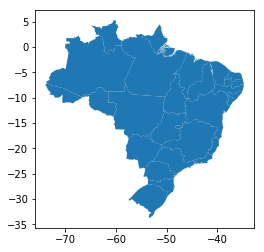

In [334]:
geodf.plot()

In [335]:
df = pd.read_csv('../DfUnic.csv')
df = df.drop(columns={df.columns[0]})
df = df.drop(columns="cod ibge")
df.head()

,ano,região,cod uf,uf,município,sexo,peso muito baixo,peso baixo,peso adequado,peso elevado,total
0,2009,CENTRO-OESTE,53.0,DF,BRASILIA,M,0.0,1.0,9.0,0.0,10.0
1,2009,CENTRO-OESTE,52.0,GO,ABADIA DE GOIAS,M,0.0,0.0,3.0,0.0,3.0
2,2009,CENTRO-OESTE,52.0,GO,ABADIANIA,M,0.0,1.0,12.0,1.0,14.0
3,2009,CENTRO-OESTE,52.0,GO,ACREUNA,M,0.0,0.0,24.0,3.0,27.0
4,2009,CENTRO-OESTE,52.0,GO,ADELANDIA,M,0.0,0.0,0.0,0.0,0.0


In [331]:
#states2008 = df.loc[df['ano'] == 2010]
#states2008

In [336]:
# Juntando as informações de todas as cidades por estado, de ambos os sexos. 
#states_df = df.groupby(['cod uf', 'ano'])[["peso muito baixo", 
#                      "peso baixo", "peso adequado", "peso elevado", 
#                      "total"]].sum()

# Abaixo, ele junta também todos os anos
states_df = df.groupby(['cod uf'])[["peso muito baixo", 
                      "peso baixo", "peso adequado", "peso elevado", 
                      "total"]].sum()

states_df.head()

,peso muito baixo,peso baixo,peso adequado,peso elevado,total
cod uf,,,,,
11.0,57.0,152.0,5598.000,675.0,6482.000
12.0,37.0,90.0,2370.000,266.0,2763.000
13.0,208.0,647.0,11056.225,1474.0,13099.511
14.0,42.0,100.0,2951.000,345.0,3438.000
15.0,566.0,1368.0,27804.000,2858.0,32596.000


In [337]:
# Fazendo o merge das informações do shapefile com o dataframe obtido pelo sisvan. 
# Assim, temos um dataframe contendo informações gerais do estado (todas as cidades)
# e de ambos os sexos, além da forma do estado, pois possui a coluna 'geometry' do shapefile
merged = geodf.set_index('COD_UF').join(states_df)
merged.head()
#merged = geodf.join(states_df)
#merged

,ESTADOS,REGIAO,UF,geometry,peso muito baixo,peso baixo,peso adequado,peso elevado,total
COD_UF,,,,,,,,,
12.0,Acre,Norte,AC,POLYGON ((-73.8009788422554 -7.111452561913211...,37.0,90.0,2370.000,266.0,2763.000
27.0,Alagoas,Nordeste,AL,(POLYGON ((-36.39119330741482 -10.500822065069...,279.0,475.0,18458.000,3039.0,22251.000
16.0,Amapá,Norte,AP,(POLYGON ((-51.37380232136843 -0.3705300556351...,10.0,73.0,1666.000,135.0,1884.000
13.0,Amazonas,Norte,AM,POLYGON ((-73.8009788422554 -7.111452561913211...,208.0,647.0,11056.225,1474.0,13099.511
29.0,Bahia,Nordeste,BA,(POLYGON ((-46.32975031667081 -13.252483567632...,1021.0,2288.0,73025.000,9338.0,85672.000


In [338]:
merged['percentual muito baixo'] = 100 * merged['peso muito baixo'] / merged['total']
merged.head()

,ESTADOS,REGIAO,UF,geometry,peso muito baixo,peso baixo,peso adequado,peso elevado,total,percentual muito baixo
COD_UF,,,,,,,,,,
12.0,Acre,Norte,AC,POLYGON ((-73.8009788422554 -7.111452561913211...,37.0,90.0,2370.000,266.0,2763.000,1.339124
27.0,Alagoas,Nordeste,AL,(POLYGON ((-36.39119330741482 -10.500822065069...,279.0,475.0,18458.000,3039.0,22251.000,1.253876
16.0,Amapá,Norte,AP,(POLYGON ((-51.37380232136843 -0.3705300556351...,10.0,73.0,1666.000,135.0,1884.000,0.530786
13.0,Amazonas,Norte,AM,POLYGON ((-73.8009788422554 -7.111452561913211...,208.0,647.0,11056.225,1474.0,13099.511,1.587846
29.0,Bahia,Nordeste,BA,(POLYGON ((-46.32975031667081 -13.252483567632...,1021.0,2288.0,73025.000,9338.0,85672.000,1.191755


Text(0.1,0.08,'Fonte: Relatórios do SISVAN (DATASUS), 2008-2018')

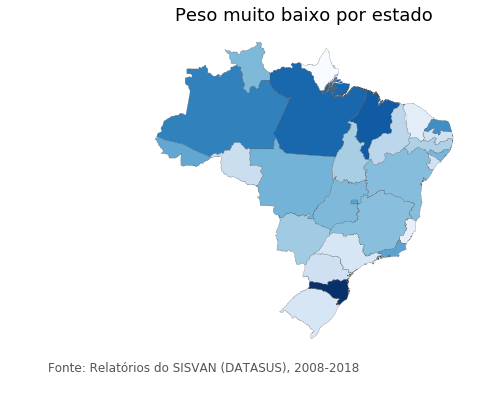

In [339]:
variable = 'percentual muito baixo'
#vmin, vmax = 0.5, 3 # A range do mapa coroplético
fig, ax = mpl.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Blues', linewidth=0.2, ax=ax, edgecolor='0.3')


ax.axis('off')
ax.set_title('Peso muito baixo por estado', fontdict={'fontsize': '18'})
ax.annotate('Fonte: Relatórios do SISVAN (DATASUS), 2008-2018', xy=(0.1, .08), xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')